# ⭐ Cricket Hackathon 2023


In [74]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [76]:
def log(*args):
    print('👉', *args)

In [77]:
def to_kebab_case(string):
    return '-'.join(
        string.replace(",", "").replace(".", "").split()
    ).lower()

In [78]:
ball_by_ball_orig = pd.read_csv('./Data/IPL_Ball_by_Ball_2008_2022.csv')

matches_result_orig = pd.read_csv('./Data/IPL_Matches_Result_2008_2022.csv')

ipl_2023_venues_data = pd.read_csv('./Data/Ipl_2023 _cricketers - Venue.csv').rename(columns={
    'Venue': 'venue'
})
ipl_2023_teams_data = pd.read_csv('./Data/Ipl_2023 _cricketers - Team name.csv').rename(columns={
    'Teams': 'team'
})
ipl_2023_players_data = pd.read_csv('./Data/Ipl_2023 _cricketers - Players.csv').rename(columns={
    'Team ': 'team'
})

# ⭐ Prepare `ball_by_ball`, `matches_result`


## Rename columns, drop unnecessary columns


In [79]:
ball_by_ball = ball_by_ball_orig.rename(columns={
    'ID': 'match_id',
    'ballnumber': 'ball_number',
    'non-striker': 'non_striker',
    'BattingTeam': 'batting_team',
}).loc[:, [
    'match_id',
    'innings',
    'batting_team',
    'overs',
    'ball_number',
    'batter',
    'bowler',
    'total_run',
]]

matches_result = matches_result_orig.rename(columns={
    'ID': 'match_id',
    'Team1': 'team_1',
    'Team2': 'team_2',
    'Venue': 'venue',
}).loc[:, [
    'match_id',
    'team_1',
    'team_2',
    'venue',
]]

## Venue mapping

In [80]:
# matches_result_orig.groupby(['City', 'Venue'], dropna=False)['Venue'].describe()

In [81]:
# https://www.iplt20.com/matches/schedule/men

venue_mapping_normal = {
    "Arun Jaitley Stadium": "Arun Jaitley Stadium",
    "Arun Jaitley Stadium, Delhi": "Arun Jaitley Stadium",
    "Feroz Shah Kotla": "Arun Jaitley Stadium",
    "Barsapara Cricket Stadium": "Barsapara Cricket Stadium",
    "Barsapara Cricket Stadium, Guwahati": "Barsapara Cricket Stadium",
    "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium",
    "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium",
    "Eden Gardens": "Eden Gardens",
    "Eden Gardens, Kolkata": "Eden Gardens",
    "Himachal Pradesh Cricket Association Stadium": "Himachal Pradesh Cricket Association Stadium",
    "Himachal Pradesh Cricket Association Stadium, Dharamsala": "Himachal Pradesh Cricket Association Stadium",
    "M Chinnaswamy Stadium": "M Chinnaswamy Stadium",
    "M Chinnaswamy Stadium, Bengaluru": "M Chinnaswamy Stadium",
    "M Chinnaswamy Stadium, Bangalore": "M Chinnaswamy Stadium",
    "M.Chinnaswamy Stadium": "M Chinnaswamy Stadium",
    "M.Chinnaswamy Stadium, Bengaluru": "M Chinnaswamy Stadium",
    "M.Chinnaswamy Stadium, Bangalore": "M Chinnaswamy Stadium",
    "MA Chidambaram Stadium": "MA Chidambaram Stadium",
    "MA Chidambaram Stadium, Chennai": "MA Chidambaram Stadium",
    "MA Chidambaram Stadium, Chepauk": "MA Chidambaram Stadium",
    "MA Chidambaram Stadium, Chepauk, Chennai": "MA Chidambaram Stadium",
    "Narendra Modi Stadium": "Narendra Modi Stadium",
    "Narendra Modi Stadium, Ahmedabad": "Narendra Modi Stadium",
    "Punjab Cricket Association IS Bindra Stadium": "Punjab Cricket Association IS Bindra Stadium",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Punjab Cricket Association Stadium, Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Rajiv Gandhi International Stadium": "Rajiv Gandhi International Stadium",
    "Rajiv Gandhi International Stadium, Hyderabad": "Rajiv Gandhi International Stadium",
    "Rajiv Gandhi International Stadium, Uppal": "Rajiv Gandhi International Stadium",
    "Sawai Mansingh Stadium": "Sawai Mansingh Stadium",
    "Sawai Mansingh Stadium, Jaipur": "Sawai Mansingh Stadium",
    "Wankhede Stadium": "Wankhede Stadium",
    "Wankhede Stadium, Mumbai": "Wankhede Stadium"
}

In [82]:
venue_mapping_kebab = {
    "arun-jaitley-stadium": "Arun Jaitley Stadium",
    "arun-jaitley-stadium-delhi": "Arun Jaitley Stadium",
    "feroz-shah-kotla": "Arun Jaitley Stadium",
    "barsapara-cricket-stadium": "Barsapara Cricket Stadium",
    "barsapara-cricket-stadium-guwahati": "Barsapara Cricket Stadium",
    "bharat-ratna-shri-atal-bihari-vajpayee-ekana-cricket-stadium": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium",
    "bharat-ratna-shri-atal-bihari-vajpayee-ekana-cricket-stadium-lucknow": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium",
    "eden-gardens": "Eden Gardens",
    "eden-gardens-kolkata": "Eden Gardens",
    "himachal-pradesh-cricket-association-stadium": "Himachal Pradesh Cricket Association Stadium",
    "himachal-pradesh-cricket-association-stadium-dharamsala": "Himachal Pradesh Cricket Association Stadium",
    "m-chinnaswamy-stadium": "M Chinnaswamy Stadium",
    "m-chinnaswamy-stadium-bengaluru": "M Chinnaswamy Stadium",
    "m-chinnaswamy-stadium-bangalore": "M Chinnaswamy Stadium",
    "mchinnaswamy-stadium": "M Chinnaswamy Stadium",
    "mchinnaswamy-stadium-bengaluru": "M Chinnaswamy Stadium",
    "mchinnaswamy-stadium-bangalore": "M Chinnaswamy Stadium",
    "ma-chidambaram-stadium": "MA Chidambaram Stadium",
    "ma-chidambaram-stadium-chennai": "MA Chidambaram Stadium",
    "ma-chidambaram-stadium-chepauk": "MA Chidambaram Stadium",
    "ma-chidambaram-stadium-chepauk-chennai": "MA Chidambaram Stadium",
    "narendra-modi-stadium": "Narendra Modi Stadium",
    "narendra-modi-stadium-ahmedabad": "Narendra Modi Stadium",
    "punjab-cricket-association-is-bindra-stadium": "Punjab Cricket Association IS Bindra Stadium",
    "punjab-cricket-association-is-bindra-stadium-mohali": "Punjab Cricket Association IS Bindra Stadium",
    "punjab-cricket-association-stadium-mohali": "Punjab Cricket Association IS Bindra Stadium",
    "rajiv-gandhi-international-stadium": "Rajiv Gandhi International Stadium",
    "rajiv-gandhi-international-stadium-hyderabad": "Rajiv Gandhi International Stadium",
    "rajiv-gandhi-international-stadium-uppal": "Rajiv Gandhi International Stadium",
    "sawai-mansingh-stadium": "Sawai Mansingh Stadium",
    "sawai-mansingh-stadium-jaipur": "Sawai Mansingh Stadium",
    "wankhede-stadium": "Wankhede Stadium",
    "wankhede-stadium-mumbai": "Wankhede Stadium"
}

In [83]:
venue_mapping_tags = {
    "delhi": "Arun Jaitley Stadium",
    "arun jaitley": "Arun Jaitley Stadium",
    "guwahati": "Barsapara Cricket Stadium",
    "barsapara": "Barsapara Cricket Stadium",
    "bhupen hazarika": "Barsapara Cricket Stadium",
    "assam cricket association stadium": "Barsapara Cricket Stadium",
    "lucknow": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium",
    "ekana": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium",
    "atal bihari": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium",
    "kolkata": "Eden Gardens",
    "eden gardens": "Eden Gardens",
    "dharamsala": "Himachal Pradesh Cricket Association Stadium",
    "himachal pradesh": "Himachal Pradesh Cricket Association Stadium",
    "bengaluru": "M Chinnaswamy Stadium",
    "bengalore": "M Chinnaswamy Stadium",
    "chinnaswamy": "M Chinnaswamy Stadium",
    "chennai": "MA Chidambaram Stadium",
    "chepauk": "MA Chidambaram Stadium",
    "chidambaram": "MA Chidambaram Stadium",
    "ahmedabad": "Narendra Modi Stadium",
    "narendra modi": "Narendra Modi Stadium",
    "mohali": "Punjab Cricket Association IS Bindra Stadium",
    "punjab cricket association": "Punjab Cricket Association IS Bindra Stadium",
    "is bindra": "Punjab Cricket Association IS Bindra Stadium",
    "hyderabad": "Rajiv Gandhi International Stadium",
    "rajiv gandhi": "Rajiv Gandhi International Stadium",
    "jaipur": "Sawai Mansingh Stadium",
    "sawai mansingh": "Sawai Mansingh Stadium",
    "mumbai": "Wankhede Stadium",
    "wankhede": "Wankhede Stadium"
}

In [84]:
# venues in `matches_result` which aren't present in `venue_mapping_normal.keys`,
# collectively considered as `Other` venue after mapping
np.setdiff1d(matches_result.venue.unique(), list(venue_mapping_normal.keys()))

array(['Barabati Stadium', 'Brabourne Stadium',
       'Brabourne Stadium, Mumbai', 'Buffalo Park',
       'De Beers Diamond Oval', 'Dr DY Patil Sports Academy',
       'Dr DY Patil Sports Academy, Mumbai',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'Green Park',
       'Holkar Cricket Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'Maharashtra Cricket Association Stadium',
       'Maharashtra Cricket Association Stadium, Pune', 'Nehru Stadium',
       'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval',
       'Sardar Patel Stadium, Motera',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sharjah Cricket Stadium', 'Sheikh Zayed Stadium',
       "St George's Park", 'Subrata Roy Sahara Stadium',
       'SuperSport Park', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Zayed Cricket Stadium, Abu Dhabi'], dtype=object)

## Team mapping


In [85]:
# set(matches_result['team_1'].unique()) == set(matches_result['team_2'].unique()) == set(ball_by_ball['batting_team'].unique())

In [86]:
team_mapping = {
    'Rajasthan Royals': 'Rajasthan Royals',
    'Gujarat Titans': 'Gujarat Titans',
    'Royal Challengers Bangalore': 'Royal Challengers Bangalore',
    'Lucknow Super Giants': 'Lucknow Super Giants',
    'Sunrisers Hyderabad': 'Sunrisers Hyderabad',
    'Mumbai Indians': 'Mumbai Indians',
    'Chennai Super Kings': 'Chennai Super Kings',
    'Kolkata Knight Riders': 'Kolkata Knight Riders',
    'Kings XI Punjab': 'Punjab Kings',
    'Punjab Kings': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Delhi Capitals': 'Delhi Capitals',
}

In [87]:
# teams in `team_mapping.keys` which aren't present in `matches_result`
# before mapping: [], after mapping: ['Delhi Daredevils', 'Kings XI Punjab']
np.setdiff1d(
    list(team_mapping.keys()), matches_result['team_1'].unique()
)

array([], dtype='<U27')

In [88]:
# teams in `matches_result` which aren't present in `team_mapping.keys`,
# collectively considered as `Other` team after mapping
np.setdiff1d(
    matches_result['team_1'].unique(), list(team_mapping.keys())
)

array(['Deccan Chargers', 'Gujarat Lions', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiant',
       'Rising Pune Supergiants'], dtype=object)

## Apply venue/team mapping


In [89]:
matches_result.venue = matches_result.venue.map(
    venue_mapping_normal).fillna('Other')

matches_result.team_1 = matches_result.team_1.map(team_mapping).fillna('Other')
matches_result.team_2 = matches_result.team_2.map(team_mapping).fillna('Other')

ball_by_ball.batting_team = ball_by_ball.batting_team.map(
    team_mapping).fillna('Other')

## list_of_ipl23_[venues, teams, players]


In [90]:
# new venues in ipl23: ['Barsapara Cricket Stadium', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium']

list_of_ipl23_venues = ['Arun Jaitley Stadium', 'Barsapara Cricket Stadium',
                        'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
                        'Eden Gardens', 'Himachal Pradesh Cricket Association Stadium',
                        'M Chinnaswamy Stadium', 'MA Chidambaram Stadium',
                        'Narendra Modi Stadium',
                        'Punjab Cricket Association IS Bindra Stadium',
                        'Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium',
                        'Wankhede Stadium']

list_of_ipl23_teams = ['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
                       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
                       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
                       'Sunrisers Hyderabad']

list_of_ipl23_players = ipl_2023_players_data[ipl_2023_players_data.team.notnull(
)].player.values

In [91]:
# list_of_ipl23_venues == venue_mapping_normal
np.array_equal(np.unique(
    list(venue_mapping_normal.values())
), list_of_ipl23_venues)

# list_of_ipl23_teams == team_mapping
np.array_equal(np.unique(
    list(team_mapping.values())
), list_of_ipl23_teams)

True

True

## Select first 6 overs, Select innings 1 & 2, Map innings (1,2) to (0,1) [in `ball_by_ball`]


In [92]:
ball_by_ball = ball_by_ball.loc[(
    ball_by_ball.overs <= 5) & (ball_by_ball.innings <= 2)]
ball_by_ball.loc[ball_by_ball.innings == 1, 'innings'] = 0
ball_by_ball.loc[ball_by_ball.innings == 2, 'innings'] = 1

# ⭐ Integration of `ball_by_ball` and `matches_result`

In [93]:
data = ball_by_ball.groupby(['match_id', 'innings', 'batting_team']).agg({
    'total_run': 'sum',
    'batter': 'unique',
    'bowler': 'unique',
}).reset_index().rename(columns={
    'batter': 'batsmen', 'bowler': 'bowlers', 'total_run': 'total_runs'
}).merge(matches_result, on=['match_id'])

In [94]:
mask = data['batting_team'] == data['team_1']
data.loc[mask, 'bowling_team'] = data['team_2']
data.loc[~mask, 'bowling_team'] = data['team_1']

In [95]:
# match_id == 829763, data for one innings is missing
# data.query('match_id == 829763')

# match_id == 829813, total_runs for one innings is 2 (probably a mistake in data entry)
# data.query('match_id == 829813')

data = data.drop(data[
    (data['match_id'] == 829763) | (data['match_id'] == 829813)
].index)

In [96]:
# get count of batsmen & bowlers for each innings
data['count_batsmen'] = [len(x) for x in data['batsmen']]
data['count_bowlers'] = [len(x) for x in data['bowlers']]

In [97]:
data = data[
    ['venue', 'innings', 'batting_team', 'bowling_team',
        'batsmen', 'bowlers', 'count_batsmen', 'count_bowlers', 'total_runs']
].reset_index(drop=True)

In [98]:
data

# data.groupby(['count_batsmen']).total_runs.describe()[['count', 'mean', '75%']].sort_values(by='75%')
# data.groupby(['count_bowlers']).total_runs.describe()[['count', 'mean', '75%']].sort_values(by='75%')

,venue,innings,batting_team,bowling_team,batsmen,bowlers,count_batsmen,count_bowlers,total_runs
0,M Chinnaswamy Stadium,0,Kolkata Knight Riders,Royal Challengers Bangalore,"[SC Ganguly, BB McCullum, RT Ponting]","[P Kumar, Z Khan, AA Noffke]",3,3,61
1,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,"[R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...","[AB Dinda, I Sharma, AB Agarkar]",6,3,26
2,Punjab Cricket Association IS Bindra Stadium,0,Chennai Super Kings,Punjab Kings,"[PA Patel, ML Hayden, MEK Hussey]","[B Lee, S Sreesanth, JR Hopes]",3,3,53
3,Punjab Cricket Association IS Bindra Stadium,1,Punjab Kings,Chennai Super Kings,"[K Goel, JR Hopes]","[JDP Oram, MS Gony]",2,2,63
4,Arun Jaitley Stadium,0,Rajasthan Royals,Delhi Capitals,"[T Kohli, YK Pathan, SR Watson, M Kaif]","[GD McGrath, B Geeves, MF Maharoof]",4,3,40
...,...,...,...,...,...,...,...,...,...
1890,Eden Gardens,1,Lucknow Super Giants,Royal Challengers Bangalore,"[Q de Kock, KL Rahul, M Vohra, DJ Hooda]","[Mohammed Siraj, JR Hazlewood, Shahbaz Ahmed]",4,3,62
1891,Narendra Modi Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,"[V Kohli, F du Plessis, RM Patidar]","[TA Boult, M Prasidh Krishna]",3,2,46
1892,Narendra Modi Stadium,1,Rajasthan Royals,Royal Challengers Bangalore,"[YBK Jaiswal, JC Buttler, SV Samson]","[Mohammed Siraj, JR Hazlewood, GJ Maxwell, Sha...",3,4,67
1893,Narendra Modi Stadium,0,Rajasthan Royals,Gujarat Titans,"[YBK Jaiswal, JC Buttler, SV Samson]","[Mohammed Shami, Yash Dayal, LH Ferguson, Rash...",3,4,44


# ⭐ `batted__<player>`, `bowled__<player>`, `batsman1__<player>`, `batsman2__<player>`

In [99]:
# <player> should be in top 4 batsmen/bowlers of respective innings
# <player> must present in `list_of_ipl23_players`

batted__ = []
batsman1__ = []
batsman2__ = []
for player_list in data.batsmen:
    batted__.append(player_list[0:4])
    batsman1__.append(player_list[0])
    batsman2__.append(player_list[1])

bowled__ = []
for player_list in data.bowlers:
    bowled__.append(player_list[0:4])

batted__ = np.unique(np.concatenate(batted__))
bowled__ = np.unique(np.concatenate(bowled__))
batsman1__ = np.unique(batsman1__)
batsman2__ = np.unique(batsman2__)

batted__ = [
    f'batted__{player}' for player in batted__ if player in list_of_ipl23_players]
bowled__ = [
    f'bowled__{player}' for player in bowled__ if player in list_of_ipl23_players]
batsman1__ = [
    f'batsman1__{player}' for player in batsman1__ if player in list_of_ipl23_players]
batsman2__ = [
    f'batsman2__{player}' for player in batsman2__ if player in list_of_ipl23_players]

(len(batted__), len(bowled__), len(batsman1__), len(batsman2__))

(90, 109, 45, 63)

In [100]:
def get_batting_data(data):
    col_dict = {}
    for col in [*batted__, *bowled__, *batsman1__, *batsman2__]:
        col_dict[col] = np.zeros(data.shape[0], dtype=np.int8)

    for i in range(data.shape[0]):
        batsmen = data.iloc[i].batsmen
        bowlers = data.iloc[i].bowlers

        player = f'batsman1__{batsmen[0]}'
        if player in list_of_ipl23_players: col_dict[player][i] = 1

        player = f'batsman2__{batsmen[1]}'
        if player in list_of_ipl23_players: col_dict[player][i] = 1

        for player in batsmen[0:4]:
            if player in list_of_ipl23_players: col_dict[f'batted__{player}'][i] = 1
        for player in bowlers[0:4]:
            if player in list_of_ipl23_players: col_dict[f'bowled__{player}'][i] = 1

    return pd.DataFrame(col_dict)

# ⭐ X, X2, y

In [101]:
X = data.drop(columns=['total_runs'])
y = data["total_runs"]

X2 = pd.concat([X, get_batting_data(X)], axis=1).drop(columns=['batsmen', 'bowlers'])
X = X.drop(columns=['batsmen', 'bowlers'])

In [102]:
X.shape
X2.shape

# X.head()
# X2.head()

(1895, 6)

(1895, 313)

# ⭐ Encoding of categorical inputs and feature scaling


In [103]:
venue_categories = list_of_ipl23_venues + ['Other']
team_categories = list_of_ipl23_teams + ['Other']

onehot = ("onehot", OneHotEncoder(sparse_output=False, drop='first', categories=[
        venue_categories, team_categories, team_categories
    ]), ["venue", "batting_team", "bowling_team"])

scaler = ("scaler", StandardScaler(), ["count_batsmen", "count_bowlers"])

onehot_scaler = ColumnTransformer([onehot, scaler], remainder='passthrough')
onehot_scaler2 = ColumnTransformer([onehot, scaler], remainder='passthrough')

X = onehot_scaler.fit_transform(X)
X2 = onehot_scaler2.fit_transform(X2)

In [104]:
# 6 + (-3 + 13 + 11 + 11 -3) = 35
X.shape

# 35 + (90 + 109 + 45 + 63 = 307) = 342
X2.shape

(1895, 35)

(1895, 342)

# ⭐ SelectKBest & PCA

## Plot the`cumulative explained variance ratio` as a function of the `number of principal components`

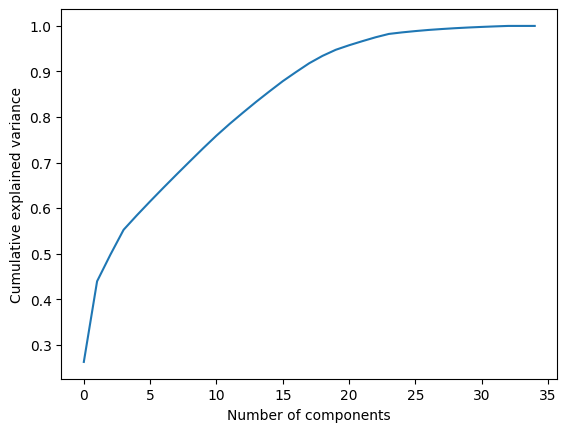

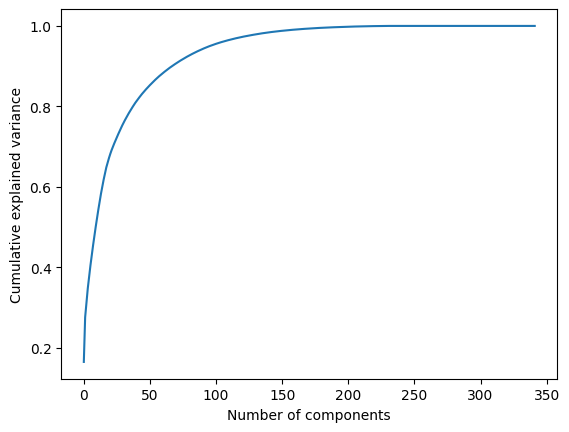

In [105]:
# PCA is an unsupervised learning algorithm that does not use any information about the target variable.

def plot(df):
    # Apply PCA to reduce the dimensions
    pca = PCA(n_components=df.shape[1])
    df_pca = pca.fit_transform(df)

    # Plot the explained variance ratio
    fig, ax = plt.subplots()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.set_xlabel('Number of components')
    ax.set_ylabel('Cumulative explained variance')
    plt.show();

plot(X)
plot(X2)

## get_[kbest, pca]_pipeline

In [106]:
def get_kbest_pipeline(k):
    return Pipeline([
        ('variance_threshold', VarianceThreshold()),
        ('kbest', SelectKBest(score_func=f_classif, k=k)),
    ])

def get_pca_pipeline(n_components):
    return Pipeline([
        ('variance_threshold', VarianceThreshold()),
        ('pca', PCA(n_components=n_components)),
    ])

def get_kbest_pca_pipeline(k, n_components):
    return Pipeline([
        ('variance_threshold', VarianceThreshold()),
        ('kbest', SelectKBest(score_func=f_classif, k=k)),
        ('pca', PCA(n_components=n_components)),
    ])

In [107]:
random_state = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train_kbest25_pipeline = get_kbest_pipeline(25)
X_train_kbest25 = X_train_kbest25_pipeline.fit_transform(X_train, y_train)
X_test_kbest25 = X_train_kbest25_pipeline.transform(X_test)

X_train_pca25_pipeline = get_pca_pipeline(25)
X_train_pca25 = X_train_pca25_pipeline.fit_transform(X_train, y_train)
X_test_pca25 = X_train_pca25_pipeline.transform(X_test)

X_train_kbest25_pca10_pipeline = get_kbest_pca_pipeline(25, 10)
X_train_kbest25_pca10 = X_train_kbest25_pca10_pipeline.fit_transform(X_train, y_train)
X_test_kbest25_pca10 = X_train_kbest25_pca10_pipeline.transform(X_test)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=random_state)

X2_train_kbest100_pipeline = get_kbest_pipeline(100)
X2_train_kbest100 = X2_train_kbest100_pipeline.fit_transform(X2_train, y2_train)
X2_test_kbest100 = X2_train_kbest100_pipeline.transform(X2_test)

X2_train_pca150_pipeline = get_pca_pipeline(150)
X2_train_pca150 = X2_train_pca150_pipeline.fit_transform(X2_train, y2_train)
X2_test_pca150 = X2_train_pca150_pipeline.transform(X2_test)

X2_train_kbest100_pca50_pipeline = get_kbest_pca_pipeline(100, 50)
X2_train_kbest100_pca50 = X2_train_kbest100_pca50_pipeline.fit_transform(X2_train, y2_train)
X2_test_kbest100_pca50 = X2_train_kbest100_pca50_pipeline.transform(X2_test)

In [108]:
def bench(X_matrices):
    best_mae = float('inf')
    best_algo = None
    best_X = None

    # Loop over the feature matrices and regression algorithms
    for X_train, X_test in X_matrices:
        for regressor in regressors:
            # Train the regression algorithm on the feature matrix
            regressor.fit(X_train, y2_train)
            
            # Evaluate the performance of the regression algorithm on the test set
            y_pred = regressor.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            
            # Check if this is the best algorithm and feature matrix so far
            if mae < best_mae:
                best_mae = mae
                best_algo = regressor.__class__.__name__
                best_X = X_train
            
            # Print the name of the regression algorithm and its performance score
            print(regressor.__class__.__name__, "MAE:", mae)

    print("Best algorithm:", best_algo)
    print("Best feature matrix:", best_X)
    print("Best MAE:", best_mae)

In [109]:
class ConstantRegressor:
    def __init__(self, n):
        self.n = n

    def predict(self, X):
        return np.repeat(self.n, X.shape[0])

regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(),
}

# bench([
#     (X2_train_kbest100, X2_test_kbest100), (X2_train_pca150, X2_test_pca150), (X2_train_kbest100_pca50, X2_test_kbest100_pca50)
# ])

# bench([
#     (X_train_kbest25, X_test_kbest25), (X_train_pca25, X_test_pca25), (X_train_kbest25_pca10, X_test_kbest25_pca10)
# ])

In [110]:
best_regressor = regressors[6]

# ⭐ Evaluation [using IPL-2023 dataset]

In [111]:
def get_test_results(y_test, y_pred):
    y_pred = np.round(y_pred).astype(int)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    total_absolute_error = np.abs(y_test - y_pred).sum()

    return {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Total Absolute Error': total_absolute_error
    }

In [122]:
import os
files = os.listdir('./FilesUsed')
all_X = []
all_y = []
for file in files:
    if 'test_file_matchid' in file:
        match_no = file[-6:-4]

        X_file_name = './FilesUsed/' + file
        y_file_name = './FilesUsed/' + 'test_file_labels_matchid_' + match_no + '.csv'

        X = pd.read_csv(X_file_name).drop(columns=['Unnamed: 0'])
        y = pd.read_csv(y_file_name)['actual_runs']

        all_X += [X]
        all_y += [y]

X_IPL23 = pd.concat(all_X, axis=0, ignore_index=True)
y_IPL23 = pd.concat(all_y, axis=0, ignore_index=True)

In [116]:
X_IPL23.innings = X_IPL23.innings.replace({1: 0, 2: 1})

X_IPL23['batsmen'] = [x.split(",") for x in X_IPL23['batsmen']]
X_IPL23['bowlers'] = [x.split(",") for x in X_IPL23['bowlers']]

X_IPL23['count_batsmen'] = [len(x) for x in X_IPL23['batsmen']]
X_IPL23['count_bowlers'] = [len(x) for x in X_IPL23['bowlers']]

X_IPL23 = X_IPL23[
    ['venue', 'innings', 'batting_team', 'bowling_team',
         'batsmen', 'bowlers', 'count_batsmen', 'count_bowlers']
]

In [118]:
ambiguous_venues = np.setdiff1d(
    X_IPL23.venue.unique(), list(venue_mapping_normal.keys()))
ambiguous_venues_mapping = {}
for venue in ambiguous_venues:
    venue_kebab_case = to_kebab_case(venue)
    if venue_kebab_case in venue_mapping_kebab:
        ambiguous_venues_mapping[venue] = venue_mapping_kebab[venue_kebab_case]
    else:
        venue_lower = venue.lower()
        for tag in venue_mapping_tags:
            if tag in venue_lower:
                ambiguous_venues_mapping[venue] = venue_mapping_tags[tag]

venue_mapping_final = {**venue_mapping_normal, **ambiguous_venues_mapping}
np.setdiff1d(X_IPL23.venue.unique(), list(venue_mapping_final.keys()))

array([], dtype=object)

In [119]:
X_IPL23.venue = X_IPL23.venue.map(venue_mapping_final).fillna('Other').replace({
    'Barsapara Cricket Stadium': 'Other',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': 'Other'
})

In [120]:
X_IPL23

,venue,innings,batting_team,bowling_team,batsmen,bowlers,count_batsmen,count_bowlers
0,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Capitals,"[F du Plessis, V Kohli, MK Lomror]","[A Nortje, AR Patel, Mustafizur Rahman, MR ...",3,5
1,M Chinnaswamy Stadium,1,Delhi Capitals,Royal Challengers Bangalore,"[PP Shaw, DA Warner, MR Marsh]","[Mohammed Siraj, WD Parnell]",3,2
2,Other,0,Lucknow Super Giants,Punjab Kings,"[Kyle Mayers, KL Rahul]","[SM Curran, Arshdeep Singh, Harpreet Brar, ...",2,4
3,Other,1,Punjab Kings,Lucknow Super Giants,"[Atharva Taide, DJM Short, P Simran Singh, ...","[Yudhvir Singh, MA Wood, Avesh Khan, K Gowt...",4,4
4,Wankhede Stadium,0,Kolkata Knight Riders,Mumbai Indians,"[Rahmanullah Gurbaz, N Jagadeesan, Venkatesh...","[Arjun Tendulkar, Cameron Green, Duan jansen...",4,4
5,Wankhede Stadium,1,Mumbai Indians,Kolkata Knight Riders,"[RG Sharma, Ishan Kishan, SA Yadav]","[Arjun Tendulkar, Cameron Green, Duan jansen...",3,4
6,Narendra Modi Stadium,0,Gujarat Titans,Rajasthan Royals,"[Shubman Gill, WP Saha, B Sai Sudarshan, HH...","[TA Boult, Sandeep Sharma, A Zampa, R Ashwin]",4,4
7,Narendra Modi Stadium,1,Rajasthan Royals,Gujarat Titans,"[YBK Jaiswal, JC Buttler, D Padikkal, SV Sa...","[Mohammed Shami, HH Pandya]",4,2
8,M Chinnaswamy Stadium,0,Chennai Super Kings,Royal Challengers Bangalore,"[DP Conway, RD Gaikwad, AM Rahane]","[Mohammed Siraj, WD Parnell, Vyshak Vijay Ku...",3,3
9,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,Chennai Super Kings,"[V Kohli, MK Lomror, F du Plessis, GJ Maxwell]","[Akash Singh, TU Deshpande, M Theekshana]",4,3
